# House Price Prediction Model

In [14]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [19]:
df.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
df.describe

<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

## Calculate Q1,Q3 and IQR

In [21]:
Q1=df["price"].quantile(0.25)
Q3=df["price"].quantile(0.75)
IQR=Q3-Q1
IQR

np.float64(2310000.0)

## Determine outlier boundaries

In [22]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

## Find outlier

In [23]:
outliers=df[(df["price"]<lower_bound)|(df["price"]>upper_bound)]

In [24]:
print("Q1",Q1)
print("Q3",Q3)
print("IQR",IQR)
print("lower_bound",lower_bound)
print("upper_bound",upper_bound)
print("\nOutliers:\n",outliers)

Q1 3430000.0
Q3 5740000.0
IQR 2310000.0
lower_bound -35000.0
upper_bound 9205000.0

Outliers:
        price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000   7420         4          2        3      yes        no       no   
1   12250000   8960         4          4        4      yes        no       no   
2   12250000   9960         3          2        2      yes        no      yes   
3   12215000   7500         4          2        2      yes        no      yes   
4   11410000   7420         4          1        2      yes       yes      yes   
5   10850000   7500         3          3        1      yes        no      yes   
6   10150000   8580         4          3        4      yes        no       no   
7   10150000  16200         5          3        2      yes        no       no   
8    9870000   8100         4          1        2      yes       yes      yes   
9    9800000   5750         3          2        4      yes       yes       no   
10   9800000  

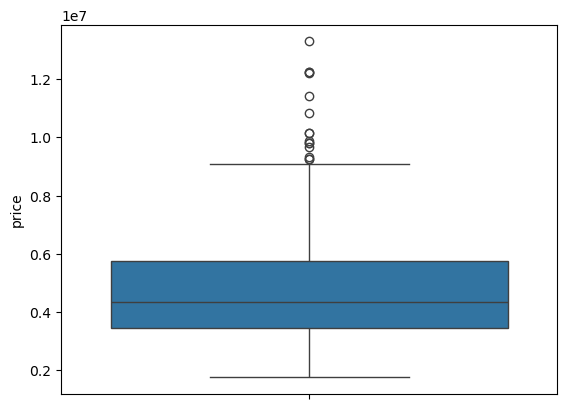

In [25]:
import seaborn as sns
sns.boxplot(df["price"]);

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [27]:
df=pd.get_dummies(df,drop_first=True)

## Define features(X) and target(y)

In [28]:
X=df.drop("price",axis=1)
y=df["price"]

## Train-Test Split

In [29]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

## Train Model

In [30]:
model=LinearRegression()

In [31]:
model.fit(X_train,y_train)

LinearRegression()

## Evaluate Model

In [32]:
y_pred=model.predict(X_test)

In [33]:
model.score(X_test,y_test)*100

63.04147151606414